In [1]:
 %load_ext autoreload
 %autoreload 2

In [2]:
import pandas as pd
from modelclass import model 
import modelwidget as mw
model.widescreen()
model.scroll_off()

In [3]:
mpak,result = model.modelload('../../models/pak.pcim',run=1,silent=1)

In [4]:
var_to_be_fixed = 'PAKGGEXPCAPTCN PAKGGEXPGNFSCN PAKGGEXPOTHRCN PAKGGEXPTRNSCN'
fix_df = mpak.fix(result,var_to_be_fixed,2021,2100)

In [5]:
_ = mpak(fix_df,silent=1,keep=f'Baseline') # _ is just a  name, the dataframe is not going to be used 

In [6]:
alternative  =  fix_df.upd("<2023 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")

In [7]:
_ = mpak(alternative,silent=1,keep=f'Tax = 29',alfa = 0.5)

In [8]:
with mpak.set_smpl(2020,2030):
    display(mpak['PAKNYGDPMKTPKN'])

In [9]:
with mpak.set_smpl(2021,2024):
    mpak.fix_inf()


Acquisition of non-financial assets

FRML <Z,EXO> PAKGGEXPCAPTCN = (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013 + PAKGGEXPCAPTCN_A)* (1-PAKGGEXPCAPTCN_D)+ PAKGGEXPCAPTCN_X*PAKGGEXPCAPTCN_D  $

FRML <CALC> PAKGGEXPCAPTCN_A = (PAKGGEXPCAPTCN) - (0.3*PAKGGEXPCAPTCN(-1)+(1-0.3)*(0.37*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+393385.011*DURING_2013)$


,PAKGGEXPCAPTCN,PAKGGEXPCAPTCN_X,PAKGGEXPCAPTCN_D,PAKGGEXPCAPTCN_A
2021,3078353.509944,3078353.509944,1,182969.550459
2022,3528758.482618,3528758.482618,1,155524.090387
2023,4022693.753653,4022693.753653,1,-69205.210181
2024,4548342.435835,4548342.435835,1,-104935.443821



Expenditure on Goods and Services

FRML <Z,EXO> PAKGGEXPGNFSCN = (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012 + PAKGGEXPGNFSCN_A)* (1-PAKGGEXPGNFSCN_D)+ PAKGGEXPGNFSCN_X*PAKGGEXPGNFSCN_D  $

FRML <CALC> PAKGGEXPGNFSCN_A = (PAKGGEXPGNFSCN) - (0.3*PAKGGEXPGNFSCN(-1)+(1-0.3)*(0.80*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0)))+505277.259999999*DURING_2012)$


,PAKGGEXPGNFSCN,PAKGGEXPGNFSCN_X,PAKGGEXPGNFSCN_D,PAKGGEXPGNFSCN_A
2021,6497667.188546,6497667.188546,1,292080.031708
2022,7494278.046748,7494278.046748,1,248267.967485
2023,8582274.931334,8582274.931334,1,-224433.172524
2024,9736041.284685,9736041.284685,1,-290467.688899



Other Expenditure

FRML <Z,EXO> PAKGGEXPOTHRCN = (-PAKGGEXPOTHRCN_A*PAKNYGDPMKTPXN*PAKNYGDPPOTLKN+PAKNYGDPMKTPXN*PAKNYGDPPOTLKN* (-0.00363915924526289) ) * (1-PAKGGEXPOTHRCN_D)+ PAKGGEXPOTHRCN_X*PAKGGEXPOTHRCN_D  $

FRML <CALC> PAKGGEXPOTHRCN_A = -PAKGGEXPOTHRCN/(PAKNYGDPMKTPXN*PAKNYGDPPOTLKN)+ ((-0.00363915924526289)) $


,PAKGGEXPOTHRCN,PAKGGEXPOTHRCN_X,PAKGGEXPOTHRCN_D,PAKGGEXPOTHRCN_A
2021,-162497.103734,-162497.103734,1,-0.000607
2022,-190323.987195,-190323.987195,1,-0.000516
2023,-219895.640181,-219895.640181,1,-0.000464
2024,-250821.370656,-250821.370656,1,-0.000368



Transfers

FRML <Z,EXO> PAKGGEXPTRNSCN = (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))) + PAKGGEXPTRNSCN_A)* (1-PAKGGEXPTRNSCN_D)+ PAKGGEXPTRNSCN_X*PAKGGEXPTRNSCN_D  $

FRML <CALC> PAKGGEXPTRNSCN_A = (PAKGGEXPTRNSCN) - (0.91020884318931*PAKGGEXPTRNSCN(-1)+(1-0.91020884318931)*(0.06*(PAKGGREVTOTLCN-PAKGGEXPINTPCN(-0))))$


,PAKGGEXPTRNSCN,PAKGGEXPTRNSCN_X,PAKGGEXPTRNSCN_D,PAKGGEXPTRNSCN_A
2021,519103.990360,519103.990360,1,42678.845770
2022,559726.959116,559726.959116,1,36277.018922
2023,599209.751283,599209.751283,1,26646.122636
2024,638786.218856,638786.218856,1,21690.048464


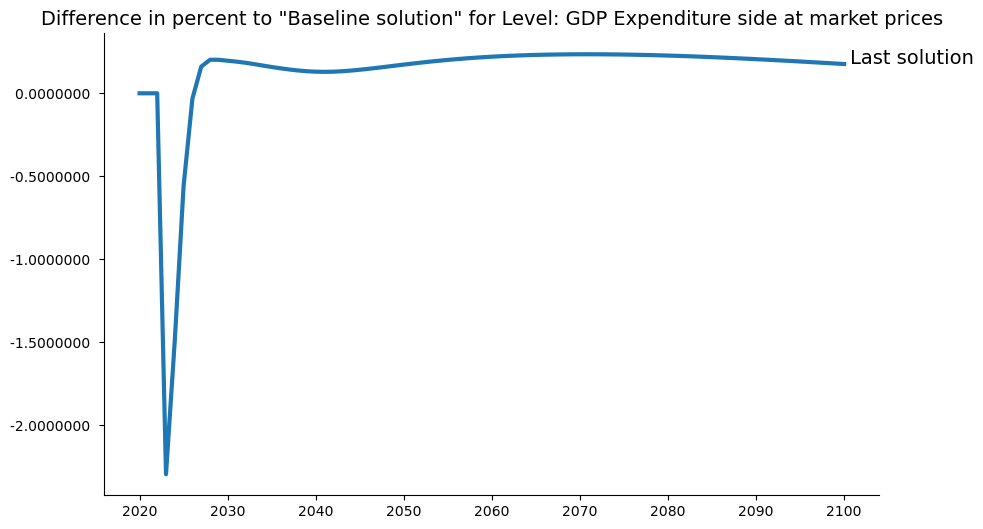

In [10]:
with mpak.keepswitch(True):
    mpak.keep_plot('PAKNYGDPMKTPKN',diffpct=1,dec=7)

In [11]:
mpak.modeldump('../../models/pak_exogenized.pcim')

In [12]:
all_fix_var =[vars for vars in zip(mpak.fix_dummy,mpak.fix_value,mpak.fix_add_factor)]
fix_names = pd.DataFrame(all_fix_var,columns=['Dummy','Fixed value','Add factor'],index=mpak.fix_endo)
mw.htmlwidget_df(mpak,fix_names).show

HTML(value='<style type="text/css">\n#T_1fcda thead tr:nth-child(1) th {\n  position: sticky;\n  background-co…

In [13]:
fixed_fix_var =[vars for vars in 
                 zip(mpak.fix_dummy_fixed,mpak.fix_value_fixed,mpak.fix_add_factor_fixed)]
fixed_names = pd.DataFrame(fixed_fix_var,columns=['Dummy','Fixed value','Add factor'],index=mpak.fix_endo_fixed)
mw.htmlwidget_df(mpak,fixed_names).show

HTML(value='<style type="text/css">\n#T_a084d thead tr:nth-child(1) th {\n  position: sticky;\n  background-co…

In [14]:
mpak.split_calc_add_factor

True

In [15]:
mpak.calc_add_factor_model.equations.split('$')[:3]

['FRML <CALC> PAKBMFSTOTHRCD_A = -PAKBMFSTOTHRCD/PAKNYGDPMKTPCD+ ((-0.0106244247103773)) ',
 ' FRML <CALC> PAKBMFSTREMTCD_A = -PAKBMFSTREMTCD/PAKNYGDPMKTPCD+ ((5.83179728399106E-05)) ',
 ' FRML <CALC> PAKBMGSRGNFSCD_A = -100*PAKBMGSRGNFSCD/PAKBMGSRGNFSCD(-1)+ (((100 * ( (PAKNEIMPGNFSCD) / (PAKNEIMPGNFSCD(-1)) -1)) +0.16331992292838*DUMH)) +100']